In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
IMAGE_WIDTH = 1280
IMAGE_HEIGHT = 720
NUMBER_OF_LANDMARKS = 100
NUMBER_OF_SEGMENTS = 100

In [58]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,10


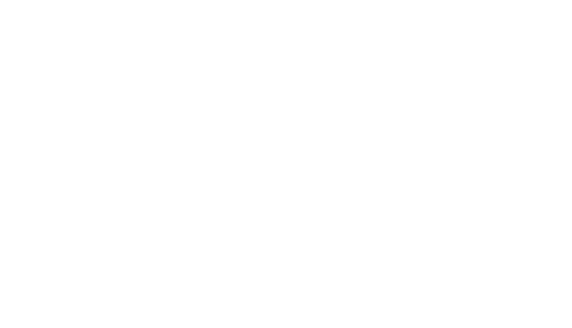

In [59]:
import numpy as np
from src.image import show_image_from_ndarray, gray2bgr

canvas = np.zeros((IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.uint8)
canvas[:] = 255
show_image_from_ndarray(canvas)

In [60]:
landmarks_xy = np.random.rand(NUMBER_OF_LANDMARKS * 2).reshape(-1, 2)
landmarks_xy[:, 0] = landmarks_xy[:, 0] * IMAGE_WIDTH
landmarks_xy[:, 1] = landmarks_xy[:, 1] * IMAGE_HEIGHT
landmarks_xy = landmarks_xy.astype(np.int16)
landmarks_xy

array([[1262,  111],
       [1134,  671],
       [1084,  361],
       [ 730,  636],
       [ 500,  127],
       [ 846,  222],
       [ 219,  465],
       [ 526,   28],
       [1035,   95],
       [ 502,  114],
       [ 515,  406],
       [ 140,  278],
       [ 515,  336],
       [1034,  169],
       [ 896,   97],
       [ 256,  565],
       [1170,  691],
       [1140,  266],
       [  88,   51],
       [ 590,  516],
       [1037,  395],
       [ 141,  578],
       [ 311,  704],
       [ 284,  198],
       [ 525,    8],
       [ 208,  209],
       [ 713,  490],
       [ 163,  509],
       [ 812,  594],
       [ 837,  627],
       [ 870,  575],
       [1211,  535],
       [1087,  650],
       [1125,  469],
       [ 331,  593],
       [ 164,  344],
       [1007,  378],
       [1187,  531],
       [1026,  572],
       [ 272,  582],
       [1227,  690],
       [1011,   42],
       [ 233,  345],
       [1184,  239],
       [ 151,  398],
       [  50,  516],
       [ 998,  660],
       [ 961,

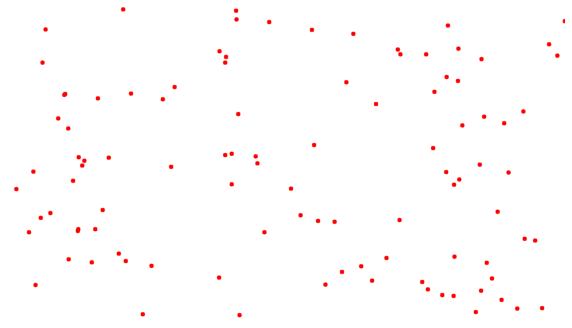

In [61]:
import cv2
canvas_dots = np.zeros_like(canvas)
canvas_dots[:] = 255

for landmark in landmarks_xy:
    cv2.circle(canvas_dots,
           center=tuple(landmark),
           radius=5,
           color=(0, 0, 255),
           thickness=-1)

show_image_from_ndarray(canvas_dots)

In [62]:
import itertools
landmark_pair_candidates = np.asarray(list(itertools.combinations(np.arange(NUMBER_OF_LANDMARKS), 2)))
landmark_pairs = landmark_pair_candidates.take(np.random.choice(landmark_pair_candidates.shape[0], NUMBER_OF_SEGMENTS, replace=False), axis=0)
print(landmark_pairs)

[[39 85]
 [25 57]
 [35 53]
 [18 62]
 [70 73]
 [ 2 36]
 [ 6 52]
 [41 66]
 [45 57]
 [40 75]
 [57 79]
 [40 65]
 [ 7 86]
 [41 82]
 [24 77]
 [14 43]
 [14 78]
 [41 77]
 [10 32]
 [42 95]
 [56 77]
 [77 99]
 [60 83]
 [18 69]
 [73 96]
 [93 98]
 [ 1 25]
 [36 38]
 [ 1 42]
 [26 79]
 [57 59]
 [41 92]
 [42 50]
 [11 24]
 [58 59]
 [43 56]
 [ 3 35]
 [22 32]
 [55 83]
 [86 88]
 [20 94]
 [17 97]
 [36 89]
 [ 1 32]
 [35 60]
 [28 53]
 [44 56]
 [10 96]
 [19 42]
 [61 70]]


In [63]:
from typing import Tuple


def calculate_slope(x0: float, y0: float, x1: float, y1: float) -> float:
    return (y1 - y0) / (x1 - x0)


def draw_full_line(image: np.ndarray, point_1: Tuple[int], point_2: Tuple[int], color=(0, 0, 0), thickness=2):
    assert (len(image.shape) == 3) and (image.shape[2] == 3)
    image_with_line = image.copy()

    image_height, image_width, _ = image.shape
    point_end_upper = np.asarray([0, 0], dtype=np.int16)
    point_end_lower = np.asarray([image_width, image_height], dtype=np.int16)

    slope = calculate_slope(point_1[0], point_1[1], point_2[0], point_2[1])
    point_end_upper[1] = -(point_1[0] - point_end_upper[0]) * slope + point_1[1]
    point_end_lower[1] = -(point_2[0] - point_end_lower[0]) * slope + point_2[1]

    cv2.line(image_with_line, (point_end_upper), point_end_lower, color=color, thickness=thickness, lineType=cv2.LINE_AA)
    return image_with_line


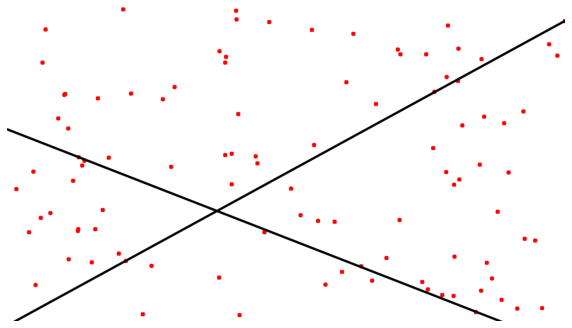

In [64]:
canvas_lines_and_dots = canvas_dots.copy()

for i in np.arange(3):
    canvas_lines_and_dots = draw_full_line(
        canvas_lines_and_dots, landmarks_xy[landmark_pairs[i, 0], :], landmarks_xy[landmark_pairs[i, 1], :]
    )

show_image_from_ndarray(canvas_lines_and_dots)


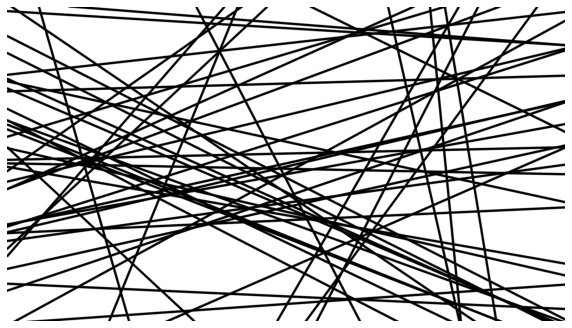

In [65]:
from src.image import save_image

canvas_lines = np.zeros_like(canvas_dots)
canvas_lines[:] = 255

for i in range(NUMBER_OF_SEGMENTS):
    canvas_lines = draw_full_line(
        canvas_lines,
        landmarks_xy[landmark_pairs[i, 0], :],
        landmarks_xy[landmark_pairs[i, 1], :],
        color=(0, 0, 0),
        thickness=3,
    )
show_image_from_ndarray(canvas_lines)
save_image("lines.png", canvas_lines)